In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from endless_line.data_utils.dataloader import DataLoader

data = DataLoader(load_all_files=True)

In [9]:
#data.clean_data()
df = data.entity_schedule
df_weather = data.weather


In [3]:
df_weather['weather_description'].unique()

array(['few clouds', 'sky is clear', 'scattered clouds', 'broken clouds',
       'overcast clouds', 'light rain', 'moderate rain', 'snow',
       'light snow', 'heavy intensity rain'], dtype=object)

In [6]:
df.dtypes

# Convert date to datetime
df['USAGE_DATE'] = pd.to_datetime(df['USAGE_DATE'])

In [10]:
df.dtypes

REF_CLOSING_DESCRIPTION     object
ENTITY_DESCRIPTION_SHORT    object
ENTITY_TYPE                 object
DEB_TIME                    object
FIN_TIME                    object
UPDATE_TIME                 object
WORK_DATE                   object
dtype: object

In [15]:

def filter_df(df, df_2):
    attractions = df_2['ATTRACTION'].tolist()
    filtered_df = df[df['ENTITY_DESCRIPTION_SHORT'].isin(attractions + ['PortAventura World'])]
    return filtered_df

# Apply the function
df_filtered = filter_df(df, df_2)
df_filtered['ENTITY_DESCRIPTION_SHORT'].unique()

filter_df(df, df_2)

,REF_CLOSING_DESCRIPTION,ENTITY_DESCRIPTION_SHORT,ENTITY_TYPE,DEB_TIME,FIN_TIME,UPDATE_TIME,WORK_DATE
1,NaN,Dizzy Dropper,ATTR,2022-04-07 08:30:00.000,2022-04-07 22:04:00.000,2022-04-08 08:00:30.000,2022-04-07
6,NaN,PortAventura World,PARK,2018-07-17 08:30:00.000,2018-07-17 09:30:00.000,2018-07-18 07:48:41.000,2018-07-17
11,NaN,PortAventura World,PARK,2019-02-28 08:30:00.000,2019-02-28 09:30:00.000,2019-03-01 09:23:40.000,2019-02-28
12,Fermeture Réhab,Kiddie Coaster,ATTR,2018-02-21 23:59:00.000,2018-02-21 23:59:00.000,2018-02-22 08:36:23.000,2018-02-21
13,NaN,PortAventura World,PARK,2019-08-18 08:30:00.000,2019-08-18 09:30:00.000,2019-08-19 07:34:17.000,2019-08-18
...,...,...,...,...,...,...,...
38301,Fermeture Réhab,Giga Coaster,ATTR,2022-08-19 23:59:00.000,2022-08-19 23:59:00.000,2022-08-20 07:37:02.000,2022-08-19
38303,Fermeture Réhab,Giga Coaster,ATTR,2022-08-20 23:59:00.000,2022-08-20 23:59:00.000,2022-08-21 09:16:53.000,2022-08-20
38304,NaN,Inverted Coaster,ATTR,2022-08-20 09:30:00.000,2022-08-20 17:48:00.000,2022-08-21 09:16:55.000,2022-08-20
38305,NaN,Inverted Coaster,ATTR,2022-08-22 09:20:00.000,2022-08-22 17:54:00.000,2022-08-23 09:02:42.000,2022-08-22


Number of negative values in the dataset:  0


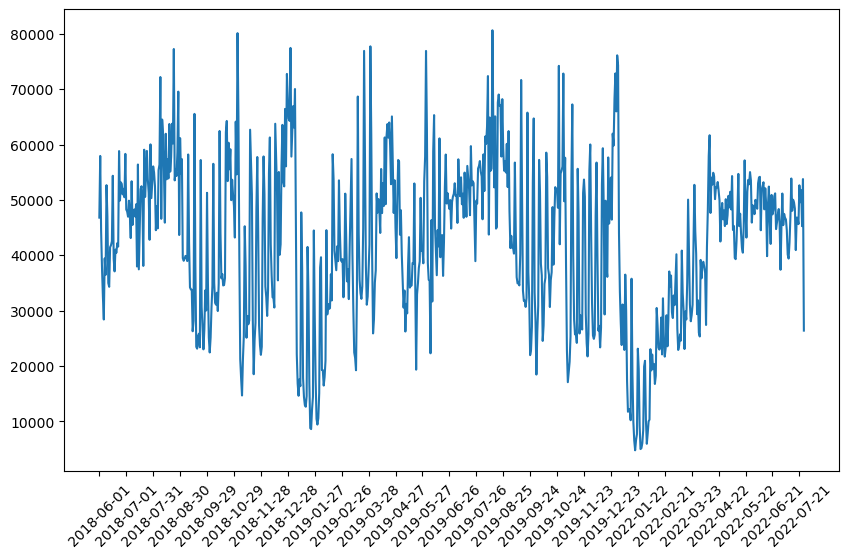

In [37]:
# count the number of negative values in the dataset
print("Number of negative values in the dataset: ", (df['attendance'] < 0).sum().sum())

# Keep only the PortAventura data
df = df[df['FACILITY_NAME'] == 'PortAventura World']


plt.figure(figsize=(10, 6))
plt.plot(df['USAGE_DATE'], df['attendance'])
# x axis should be the months
plt.xticks(np.arange(0, len(df), step=30), df['USAGE_DATE'][::30], rotation=45)
plt.show()

In [ ]:
# Convert time columns to datetime format
waiting_times["DEB_TIME"] = pd.to_datetime(waiting_times["DEB_TIME"])
waiting_times["FIN_TIME"] = pd.to_datetime(waiting_times["FIN_TIME"])
entity_schedule["DEB_TIME"] = pd.to_datetime(entity_schedule["DEB_TIME"])
entity_schedule["FIN_TIME"] = pd.to_datetime(entity_schedule["FIN_TIME"])

print('1')

# Merge datasets to check if the ride was open during the DEB_TIME. Only keep the weiting_times rows
merged = waiting_times.merge(
    entity_schedule, 
    left_on="ENTITY_DESCRIPTION_SHORT", 
    right_on="ENTITY_DESCRIPTION_SHORT", 
    suffixes=("_waiting", "_schedule"),
    how="left"
)
print('2')


# Keep only rows where the DEB_TIME of waiting_times is within the attraction's open hours
filtered = merged[
    (merged["DEB_TIME_waiting"] >= merged["DEB_TIME_schedule"]) &
    (merged["DEB_TIME_waiting"] <= merged["FIN_TIME_schedule"])
]
print('3')

# Drop unnecessary columns
filtered = filtered[waiting_times.columns]
print('4')

filtered.head(10)


1


In [7]:
df = data.weather

df.head(50)

,dt_iso,temp,feels_like,pressure,wind_speed,clouds_all,weather_main,weather_description
166560,2018-01-01 00:00:00,8.94,5.21,1007,8.32,23,Clouds,few clouds
166561,2018-01-01 01:00:00,8.07,4.09,1008,8.26,4,Clear,sky is clear
166562,2018-01-01 02:00:00,7.76,3.81,1009,7.81,27,Clouds,scattered clouds
166563,2018-01-01 03:00:00,7.57,3.63,1010,7.59,78,Clouds,broken clouds
166564,2018-01-01 04:00:00,6.86,2.88,1010,7.06,52,Clouds,broken clouds
166565,2018-01-01 05:00:00,6.85,2.95,1010,6.81,36,Clouds,scattered clouds
166566,2018-01-01 06:00:00,6.48,2.40,1010,7.03,49,Clouds,scattered clouds
166567,2018-01-01 07:00:00,6.72,2.80,1009,6.76,100,Clouds,overcast clouds
166568,2018-01-01 08:00:00,6.67,2.69,1008,6.91,100,Clouds,overcast clouds
166569,2018-01-01 09:00:00,6.76,2.62,1007,7.48,100,Clouds,overcast clouds


In [10]:
df['weather_description'].unique()

array(['few clouds', 'sky is clear', 'scattered clouds', 'broken clouds',
       'overcast clouds', 'light rain', 'moderate rain', 'snow',
       'light snow', 'heavy intensity rain'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [12]:
# Encode categorical variables
label_enc_main = LabelEncoder()
label_enc_desc = LabelEncoder()

weather_mapping = {
    'sky is clear': 0,
    'few clouds': 1,
    'scattered clouds': 2,
    'broken clouds': 3,
    'overcast clouds': 4,
    'light rain': 5,
    'moderate rain': 6,
    'heavy intensity rain': 7,
    'light snow': 8,
    'snow': 9
}

df['weather_description_encoded'] = df['weather_description'].map(weather_mapping)

df['weather_main_encoded'] = label_enc_main.fit_transform(df['weather_main'])

# Drop original categorical columns if necessary
df.drop(columns=['weather_main', 'weather_description'], inplace=True)

# Normalize numerical columns
scaler = MinMaxScaler()
num_cols = ['temp', 'feels_like', 'pressure', 'wind_speed', 'clouds_all']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Create additional time-based features
df['hour'] = df['dt_iso'].dt.hour
df['day'] = df['dt_iso'].dt.day
df['month'] = df['dt_iso'].dt.month
df['day_of_year'] = df['dt_iso'].dt.dayofyear

In [13]:
df.head()

,dt_iso,temp,feels_like,pressure,wind_speed,clouds_all,weather_description_encoded,weather_main_encoded,hour,day,month,day_of_year
166560,2018-01-01 00:00:00,0.351395,0.344892,0.453125,0.665597,0.23,1,1,0,1,1,1
166561,2018-01-01 01:00:00,0.333935,0.325760,0.468750,0.660786,0.04,0,0,1,1,1,1
166562,2018-01-01 02:00:00,0.327714,0.320977,0.484375,0.624699,0.27,2,1,2,1,1,1
166563,2018-01-01 03:00:00,0.323901,0.317902,0.500000,0.607057,0.78,3,1,3,1,1,1
166564,2018-01-01 04:00:00,0.309653,0.305091,0.500000,0.564555,0.52,3,1,4,1,1,1


In [ ]:
# Drop dt_iso if not needed
df.drop(columns=['dt_iso'], inplace=True)